# Import all the libraries here

In [22]:
# basic
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# ml preprocessing
from sklearn.model_selection import train_test_split


# ml models
from sklearn.linear_model import LinearRegression


# ml metrics
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error

# additional settings
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

## Load data

In [5]:
data = pd.read_csv("../data/financial_data_ml.csv", index_col=0)
df = data.copy()

In [6]:
df.head(4)

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,mortgage_rate,vix,wti,volume,month,year,inflation_pct_change,gdp_pct_change,m2_money_supp_pct_change,exports_pct_change,imports_pct_change,new_home_const_pct_change,wti_pct_change,inflation_category,interest_rate_category,crisis_period,sp_close_pct_change,sp_close
0,2000-04-01,170.9,3.8,10247.72,6.02,6.03,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,24.11,26.86,1.227400e+09,Apr,2000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Low,Hawkish,Stable,0.000000,1498.579956
1,2000-04-03,170.9,3.8,10247.72,6.02,6.00,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,24.03,26.28,1.021700e+09,Apr,2000,0.0,0.0,0.0,0.0,0.0,0.0,-2.159345,Low,Hawkish,Stable,0.493134,1505.969971
2,2000-04-04,170.9,3.8,10247.72,6.02,5.90,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,27.12,25.46,1.515460e+09,Apr,2000,0.0,0.0,0.0,0.0,0.0,0.0,-3.120244,Low,Hawkish,Stable,-0.746362,1494.729980
3,2000-04-05,170.9,3.8,10247.72,6.02,5.90,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,28.41,25.76,1.110300e+09,Apr,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.178319,Low,Hawkish,Stable,-0.492396,1487.369995


**Some comments**
- Here I am not trying to forecast S&P 500. I am more interested in the percentage change.
- So I can drop `date`, `month`, `year`, `sp_close`.
- My target is then `sp_pct_change`
- This can tell me how the market will change each day.

In [7]:
## drop the above columns then
df = df.drop(columns=["date", "month", "year", "sp_close"])

In [8]:
df.head(2)

,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,mortgage_rate,vix,wti,volume,inflation_pct_change,gdp_pct_change,m2_money_supp_pct_change,exports_pct_change,imports_pct_change,new_home_const_pct_change,wti_pct_change,inflation_category,interest_rate_category,crisis_period,sp_close_pct_change
0,170.9,3.8,10247.72,6.02,6.03,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,24.11,26.86,1.227400e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Low,Hawkish,Stable,0.000000
1,170.9,3.8,10247.72,6.02,6.00,4767.8,109.2,92.6659,1093.36,1455.86,1626.0,8.23,24.03,26.28,1.021700e+09,0.0,0.0,0.0,0.0,0.0,0.0,-2.159345,Low,Hawkish,Stable,0.493134


## One hot encoding

Before applying any baseline models, we have to transform the 
categorical columns to numerical ones.

In [11]:
df = pd.get_dummies(df, drop_first=True)

In [14]:
df = df * 1

In [15]:
df

,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,mortgage_rate,vix,wti,volume,inflation_pct_change,gdp_pct_change,m2_money_supp_pct_change,exports_pct_change,imports_pct_change,new_home_const_pct_change,wti_pct_change,sp_close_pct_change,inflation_category_Low,inflation_category_Moderate,interest_rate_category_Hawkish,interest_rate_category_Neutral,crisis_period_Financial Crisis,crisis_period_Russia-Ukraine crisis,crisis_period_Stable
0,170.900,3.8,10247.720,6.02,6.03,4767.8,109.2,92.6659,1093.36,1455.860,1626.0,8.23,24.11,26.86,1.227400e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1,0,1,0,0,0,1
1,170.900,3.8,10247.720,6.02,6.00,4767.8,109.2,92.6659,1093.36,1455.860,1626.0,8.23,24.03,26.28,1.021700e+09,0.0,0.0,0.0,0.0,0.0,0.0,-2.159345,0.493134,1,0,1,0,0,0,1
2,170.900,3.8,10247.720,6.02,5.90,4767.8,109.2,92.6659,1093.36,1455.860,1626.0,8.23,27.12,25.46,1.515460e+09,0.0,0.0,0.0,0.0,0.0,0.0,-3.120244,-0.746362,1,0,1,0,0,0,1
3,170.900,3.8,10247.720,6.02,5.90,4767.8,109.2,92.6659,1093.36,1455.860,1626.0,8.23,28.41,25.76,1.110300e+09,0.0,0.0,0.0,0.0,0.0,0.0,1.178319,-0.492396,1,0,1,0,0,0,1
4,170.900,3.8,10247.720,6.02,5.93,4767.8,109.2,92.6659,1093.36,1455.860,1626.0,8.23,27.15,25.51,1.008000e+09,0.0,0.0,0.0,0.0,0.0,0.0,-0.970497,0.939240,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6598,319.775,4.1,29719.647,4.33,4.25,21561.4,71.7,104.2062,3218.60,4149.659,1501.0,6.65,19.90,67.84,4.660090e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.079850,1,0,1,0,0,0,1
6599,319.775,4.1,29719.647,4.33,4.24,21561.4,71.7,104.2062,3218.60,4149.659,1501.0,6.67,19.80,67.84,4.678420e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.218489,1,0,1,0,0,0,1
6600,319.775,4.1,29719.647,4.33,4.25,21561.4,71.7,104.2062,3218.60,4149.659,1501.0,6.67,19.28,67.84,9.367460e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.082465,1,0,1,0,0,0,1
6601,319.775,4.1,29719.647,4.33,4.25,21561.4,71.7,104.2062,3218.60,4149.659,1501.0,6.67,17.48,67.84,4.517990e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.764600,1,0,1,0,0,0,1


## Baseline model

### X-y 

In [16]:
X = df.drop(columns=["sp_close_pct_change"])
y = df["sp_close_pct_change"]

### Train test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Simple Linear Regression Model

In [18]:
model_lr = LinearRegression()

In [19]:
# train the model
model_lr.fit(X_train, y_train)

LinearRegression()

In [20]:
# prediction with training and testing data
y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

In [23]:
# calculate the r2 score
r2_train_lr = r2_score(y_train, y_pred_train)
r2_test_lr = r2_score(y_test, y_pred_test)

In [24]:
# print the results
print(f"The r2 score with training data: {r2_train_lr}")
print(f"The r2 score with test data: {r2_test_lr}")

The r2 score with training data: 0.04928728924219372
The r2 score with test data: 0.08655153505081525


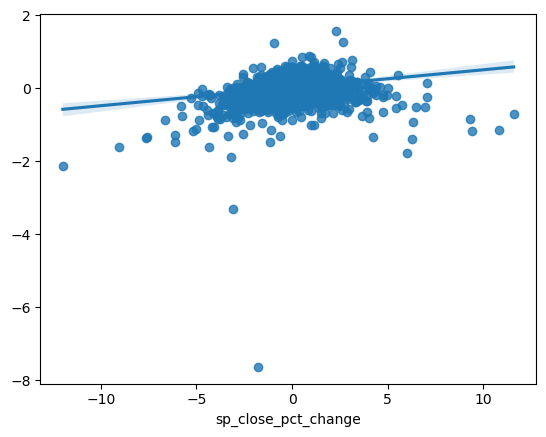

In [27]:
# check with plot
sns.regplot(x=y_train, y=y_pred_train)
plt.show()

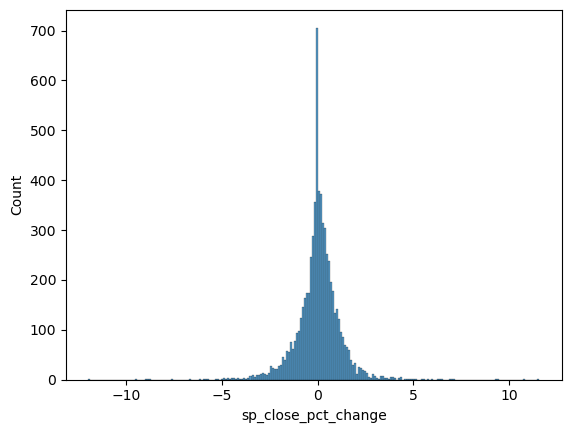

In [28]:
sns.histplot(x=df["sp_close_pct_change"])
plt.show()

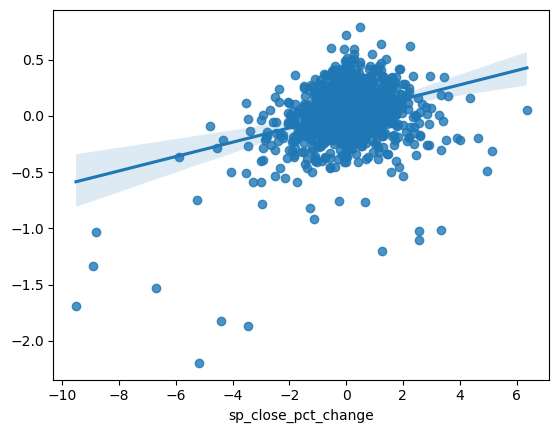

In [29]:
# check with plot
sns.regplot(x=y_test, y=y_pred_test)
plt.show()